In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
%cd /content/gdrive/My Drive/Kaggle/
%mkdir flight-price-prediction
%cd flight-price-prediction

Mounted at /content/gdrive
/content/gdrive/My Drive/Kaggle
/content/gdrive/My Drive/Kaggle/flight-price-prediction


In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
%matplotlib inline

In [249]:
df = pd.read_excel("Data_Train.xlsx")

In [250]:
train_df = df

In [251]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [252]:
test_df = pd.read_excel("Test_set.xlsx")

In [253]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [254]:
big_df = train_df

In [255]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


##EDA

In [256]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

##Feature Engineering

In [257]:
big_df["Date"] = big_df["Date_of_Journey"].str.split('/').str[0]
big_df["Month"] = big_df["Date_of_Journey"].str.split('/').str[1]
big_df["Year"] = big_df["Date_of_Journey"].str.split('/').str[2]

In [258]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
dtype: object

In [259]:
big_df["Date"] = big_df["Date"].astype(int)
big_df["Month"] = big_df["Month"].astype(int)
big_df["Year"] = big_df["Year"].astype(int)

In [260]:
big_df.drop(columns=["Date_of_Journey"],axis = 1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [261]:
big_df["Arrival_Time"] = big_df["Arrival_Time"].str.split(" ").str[0]

In [262]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [263]:
big_df.Total_Stops.isnull().mean()

9.360666479453337e-05

In [264]:
big_df.Total_Stops = big_df.Total_Stops.fillna("1 stop")

In [265]:
big_df.Total_Stops = big_df.Total_Stops.replace("non-stop","0 stop")

In [266]:
big_df.Total_Stops =  big_df["Total_Stops"].str.split(" ").str[0]

In [267]:
big_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,2019


In [268]:
big_df.Total_Stops = big_df.Total_Stops.astype(int)

In [269]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops         int64
Additional_Info    object
Price               int64
Date                int64
Month               int64
Year                int64
dtype: object

In [270]:
big_df["Arrival_Hour"] = big_df["Arrival_Time"].str.split(':').str[0].astype(int)
big_df["Arrival_Minutes"] = big_df["Arrival_Time"].str.split(':').str[1].astype(int)

In [271]:
big_df.drop(["Date_of_Journey"],axis = 1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,1,3,2019,14,10


In [272]:
big_df["Departure_Hour"] = big_df["Dep_Time"].str.split(':').str[0].astype(int)
big_df["Departure_Minutes"] = big_df["Dep_Time"].str.split(':').str[1].astype(int)

In [273]:
big_df.drop(["Dep_Time"],axis = 1,inplace=True)
big_df.drop(["Arrival_Time"],axis = 1,inplace=True)
big_df.drop(["Date_of_Journey"],axis = 1,inplace=True)

In [274]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [275]:
big_df["Route1"] =  big_df["Route"].str.split("→ ").str[0]
big_df["Route2"] =  big_df["Route"].str.split("→ ").str[1]
big_df["Route3"] =  big_df["Route"].str.split("→ ").str[2]
big_df["Route4"] =  big_df["Route"].str.split("→ ").str[3]
big_df["Route5"] =  big_df["Route"].str.split("→ ").str[4]

In [276]:
for i in range(5):
  big_df["Route{}".format(i+1)] = big_df["Route{}".format(i+1)].fillna("None")

In [277]:
ls_hr = list(big_df["Duration"].str.split(" ").str[0].astype(str))

In [278]:
ls_min = list(big_df["Duration"].str.split(" ").str[1].astype(str) )

In [279]:
for i in range(len(ls_hr)):
  ls_hr[i] = int(ls_hr[i][0:-1])

In [280]:
for i in range(len(ls_min)):
  if ls_min[i]=='nan':
    ls_min[i] = 0
  else:  
    ls_min[i] = 1/60*int(ls_min[i][0:-1])

In [281]:
for i in range(len(ls_hr)):
  ls_hr[i] += ls_min[i]

In [282]:
big_df["Duration_x"] = ls_hr

In [283]:
big_df.drop(["Duration"],inplace = True,axis =1 )

In [285]:
big_df.drop(["Route"],inplace = True,axis =1 )

In [286]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Route1,Route2,Route3,Route4,Route5,Duration_x
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,2.833333
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,7.416667
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,19.000000
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,5.416667
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,4.750000


##Handling Missing Values

##Label_Encoding

In [289]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Route1,Route2,Route3,Route4,Route5,Duration_x
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,BLR,DEL,None,None,None,2.833333
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,CCU,IXR,BBI,BLR,None,7.416667
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,DEL,LKO,BOM,COK,None,19.000000
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,CCU,NAG,BLR,None,None,5.416667
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,BLR,NAG,DEL,None,None,4.750000


In [290]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [291]:
big_df.Airline = le.fit_transform(big_df["Airline"])

In [292]:
big_df.Source = le.fit_transform(big_df["Source"])
big_df.Destination = le.fit_transform(big_df["Destination"])
big_df.Additional_Info = le.fit_transform(big_df["Additional_Info"])

In [293]:
big_df.Route1 = le.fit_transform(big_df.Route1)
big_df.Route2 = le.fit_transform(big_df.Route2)
big_df.Route3 = le.fit_transform(big_df.Route3)
big_df.Route4 = le.fit_transform(big_df.Route4)
big_df.Route5 = le.fit_transform(big_df.Route5)

In [295]:
big_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Route1,Route2,Route3,Route4,Route5,Duration_x
0,3,0,5,0,8,3897,24,3,2019,1,10,22,20,0,13,24,12,4,2.833333
1,1,3,0,2,8,7662,1,5,2019,13,15,5,50,2,25,1,3,4,7.416667
2,4,2,1,2,8,13882,9,6,2019,4,25,9,25,3,32,4,5,4,19.000000
3,3,3,0,1,8,6218,12,5,2019,23,30,18,5,2,34,3,12,4,5.416667
4,3,0,5,1,8,13302,1,3,2019,21,35,16,50,0,34,8,12,4,4.750000


##Train-Test-Split

In [296]:
y_df = big_df["Price"]
big_df.drop("Price",inplace = True,axis = 1)

In [298]:
from sklearn.model_selection import train_test_split


In [299]:
x_train,x_test,y_train,y_test = train_test_split(big_df,y_df,test_size = 0.2)

In [301]:
y_train

4040      9358
1084      7757
8826     14571
8461     16736
9525     10262
         ...  
5073     11911
4182      8040
3761     14388
2918     10262
10139    10844
Name: Price, Length: 8546, dtype: int64

In [303]:
y_test

4049     9719
440      5228
4899     7252
7007     3971
4749     5277
        ...  
4314     8907
5679    12358
7417     2227
5117     3687
5841     8534
Name: Price, Length: 2137, dtype: int64

##Feature Selection

In [304]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [305]:
model = SelectFromModel(Lasso(alpha = 0.005))

In [306]:
model.fit(x_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=None,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [311]:
big_df.columns[model.get_support()]

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Date', 'Month', 'Arrival_Hour', 'Arrival_Minutes', 'Departure_Hour',
       'Departure_Minutes', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Duration_x'],
      dtype='object')

In [312]:
x_train.drop("Year",axis = 1)
x_test.drop("Year",axis = 1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Arrival_Hour,Arrival_Minutes,Departure_Hour,Departure_Minutes,Route1,Route2,Route3,Route4,Route5,Duration_x
4049,1,2,1,1,8,27,5,19,15,3,50,3,7,6,12,4,15.416667
440,1,0,2,0,8,21,4,23,55,21,5,0,13,24,12,4,2.833333
4899,3,3,0,1,8,6,5,2,15,21,0,2,38,3,12,4,5.250000
7007,8,0,2,0,8,3,6,12,20,9,30,0,13,24,12,4,2.833333
4749,3,1,4,0,8,18,6,0,25,22,5,4,8,24,12,4,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4314,1,2,1,1,8,12,6,23,0,20,30,3,6,6,12,4,26.500000
5679,1,0,5,2,8,3,3,10,35,6,45,0,7,23,6,4,27.833333
7417,3,4,3,0,8,1,4,21,40,20,5,1,19,24,12,4,1.583333
5117,10,1,4,0,8,6,5,9,20,7,5,4,8,24,12,4,2.250000


##Machine Learning

###Random Forest

In [313]:
from sklearn.model_selection import RandomizedSearchCV

In [314]:
n_estimators = [int(x) for x in np.linspace(100,1200,num = 12)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [315]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf
               }

In [316]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [317]:
rf_cv = RandomizedSearchCV(rf,random_grid,scoring="neg_mean_squared_error",n_iter=50,cv=5,verbose=2)

In [318]:
rf_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   9.0s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.0s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   8.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   8.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   8.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=25, total=   8.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=20, total=   3.3s
[CV] n_estimators=600, min_samples_split=10, min

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 27.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [319]:
y_pred = rf_cv.predict(x_test)

In [320]:
from sklearn.metrics import classification_report,confusion_matrix

In [327]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))
#MAE: 26745.1109986

624.1808760880851


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


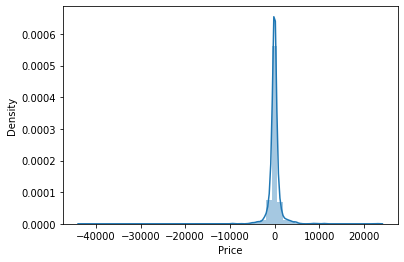

In [328]:
sns.distplot(y_test-y_pred)